<a href="https://colab.research.google.com/github/SangamSilwal/Machine-learning-Series/blob/main/Logistics_Regression_GradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import make_classification
import numpy as np
X,y = make_classification(n_samples=1000,n_features=2,n_informative=1,n_redundant=0,n_classes=2,n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=20)
print(X)
print(y)

[[-0.20535429 -4.56215699]
 [-0.31575309 -2.57527212]
 [-0.25640262 -4.17602261]
 ...
 [-0.42153598  0.47787403]
 [ 0.37325639  0.78666174]
 [-0.06012331 -3.00239175]]
[0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1
 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0 1 1
 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 1 1 1 1 0 0 1 0 0 1
 0 1 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 1
 1 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 0 0
 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 0 1 1
 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1
 1 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 1 0 1 1
 1 0 0 0 1 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0
 0 0 1 0 1 1 0 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0
 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0
 1 1 0 

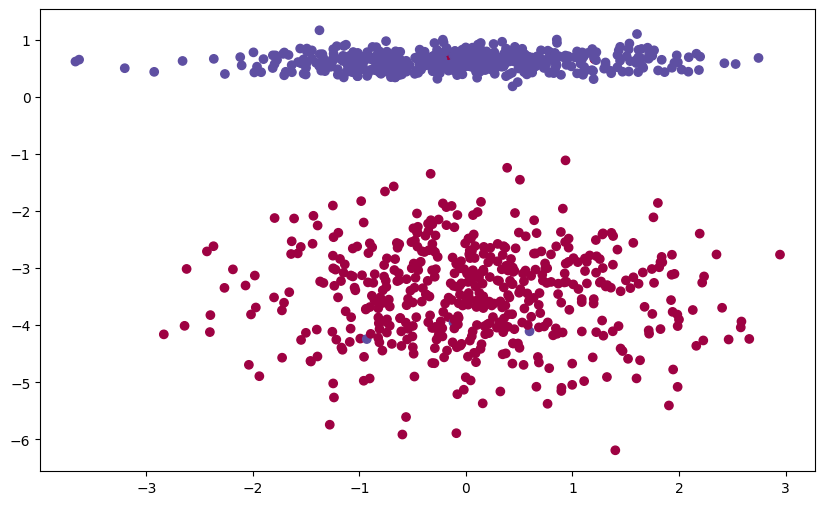

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.Spectral)
plt.show()

In [7]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(penalty=None,solver='sag')
lor.fit(X,y)

LogisticRegression(penalty=None, solver='sag')

In [8]:
print(lor.coef_)
print(lor.intercept_)

[[-0.33041475  2.67976582]]
[2.75599409]


In [9]:

m1 = -(lor.coef_[0][0]/lor.coef_[0][1])
b1 = -(lor.intercept_/lor.coef_[0][1])

In [10]:
x_input = np.linspace(-3,3,100)
y_input = m1*x_input + b1

In [11]:
def gd(X,y):
  X = np.insert(X,0,1,axis=1)
  weights = np.ones(X.shape[1])
  lr = 0.5

  for i in range(5000):
    y_hat = sigmoid(np.dot(X,weights))
    weights = weights + lr*(np.dot((y-y_hat),X)/X.shape[0])

  return weights[1:],weights[0]

In [12]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [13]:
coef_,intercept_ = gd(X,y)

In [14]:

m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [15]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input1 + b

(-3.0, 2.0)

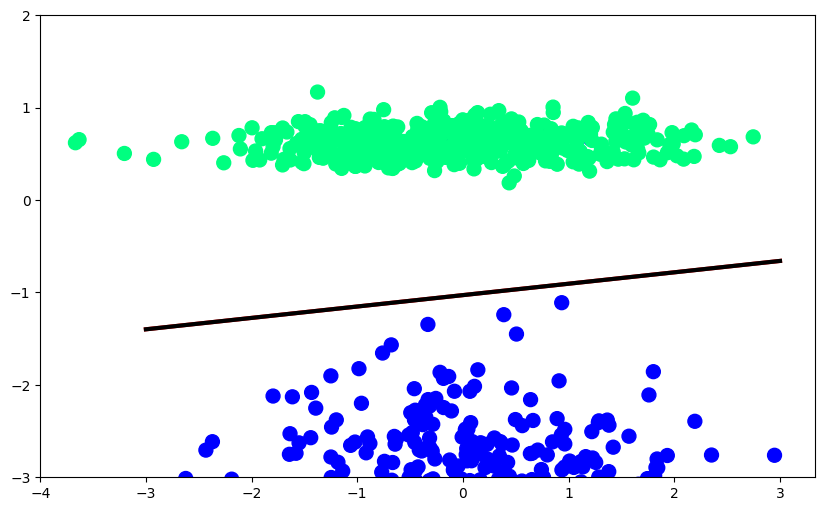

In [16]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)